In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from IPython.display import Image
from IPython.core.display import HTML

In [170]:
%%bash

rm -r ./__collection__/*

In [171]:
! python src/Generator.py -i . -o ./__collection__

(981, 365, 3) (416, 154) (0, 131)
(623, 317, 3) (416, 211) (0, 103)


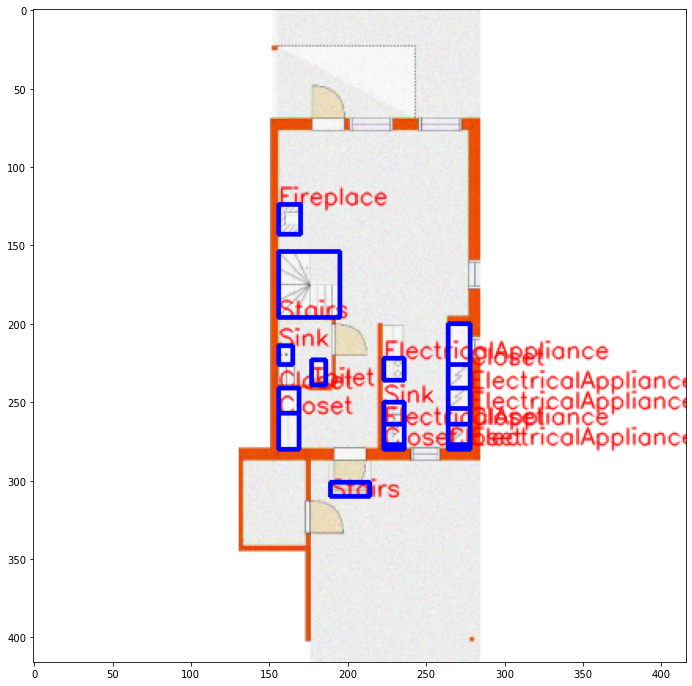

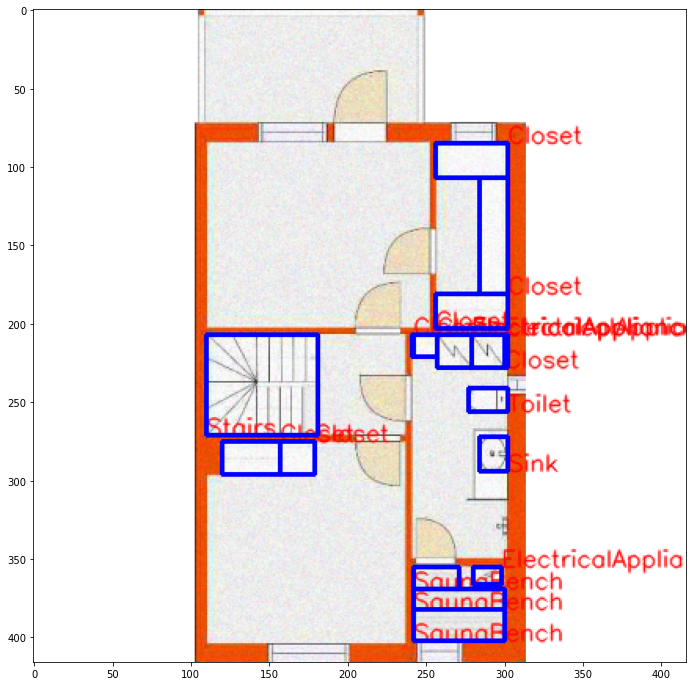

In [172]:
import os, cv2
import matplotlib.pyplot as plt
import numpy as np
import src.HouseConfig as Mapper

def viewPoly(task):
    for filename in os.scandir(f'./__collection__/{task}/image'):
        if filename.is_file():
            [ID, folder, type, ext] = filename.name.split('.')

            with open(f'./__collection__/{task}/label/{ID}.label.{type}.txt') as f:
                lines = f.read().split('\n')
            
            img = cv2.imread(f'./__collection__/{task}/image/{filename.name}')
            shape = 416
            
            pts = []
            for line in lines:
                poly = np.round(np.array(list(map(float, line.split(' ')))) * 416).astype(int)
                pts.append(np.array([np.clip(poly[2::2], 0,415), np.clip(poly[1::2], 0,415)]).T.reshape((-1, 1, 2)))
                cv2.putText(img, Mapper.getIconName(int(poly[0] // 416)), (poly[4], poly[3]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

            img = cv2.polylines(img, pts, True, (255, 0, 0), 2)

            plt.figure(figsize=(12,12))
            plt.imshow(img[:,:,::-1])


viewPoly('symbol-detection')